In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

from mesh_predictor import ProjectionPredictor

In [2]:
reg_xyz = ProjectionPredictor.from_h5('../../models/springback_uv_xyz.h5')
reg_thickness = ProjectionPredictor.from_h5('../../models/springback_uv_thickness.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [37]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def visualize(x,y):
    plt.figure()
    plt.imshow(y[0, :, :].T)
    plt.title("Thickness")
    plt.colorbar()
    plt.figure()
    plt.imshow(y[1, :, :].T)
    plt.title("Plastic strain")
    plt.colorbar()
    plt.figure()
    plt.imshow(y[2, :, :].T)
    plt.title("Thinning")
    plt.colorbar()
    plt.show()


def combine(coord, feat):
    fig = plt.figure(figsize=(20, 8))
    plt.subplot(231)
    plt.imshow(feat[0, :, :].T)
    plt.title("Thickness")
    plt.colorbar()
    plt.subplot(232)
    plt.imshow(feat[1, :, :].T)
    plt.title("Plastic strain")
    plt.colorbar()
    plt.subplot(233)
    plt.imshow(feat[2, :, :].T)
    plt.title("Thinning")
    plt.colorbar()

    ax = fig.add_subplot(234, projection='3d')
    p = ax.scatter(
        coord[0, :, :].flatten(),  
        coord[1, :, :].flatten(),
        coord[2, :, :].flatten(),
        s=0.1,
        c=feat[0, :, :].flatten()
    )
    ax = fig.add_subplot(235, projection='3d')
    p = ax.scatter(
        coord[0, :, :].flatten(),  
        coord[1, :, :].flatten(),
        coord[2, :, :].flatten(),
        s=0.1,
        c=feat[1, :, :].flatten()
    )
    ax = fig.add_subplot(236, projection='3d')
    p = ax.scatter(
        coord[0, :, :].flatten(),  
        coord[1, :, :].flatten(),
        coord[2, :, :].flatten(),
        s=0.1,
        c=feat[2, :, :].flatten()
    )

    plt.tight_layout()

In [38]:
process_parameters = {
    'Blechdicke': 1.01, 
    'Niederhalterkraft': 400.0, 
    'Ziehspalt': 2.4, 
    'Einlegeposition': -5, 
    'Ziehtiefe': 30,
    'Stempel_ID': 3,
    'E': 191.37245,
    'Rp0': 138.22696,
    'Rp50': 449.528189,
}

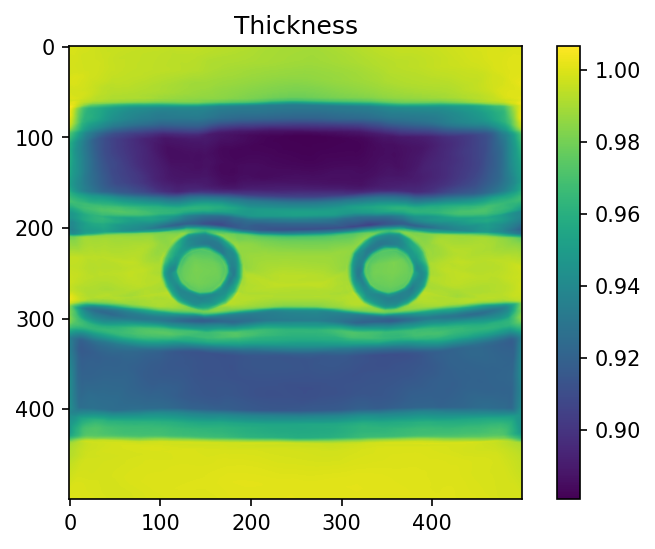

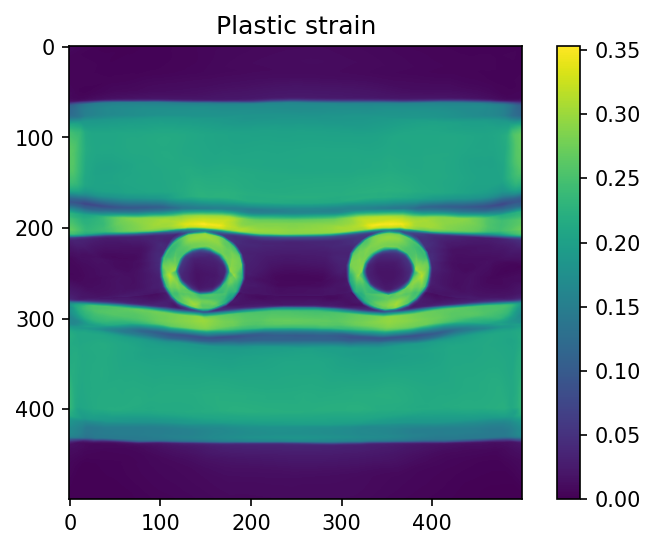

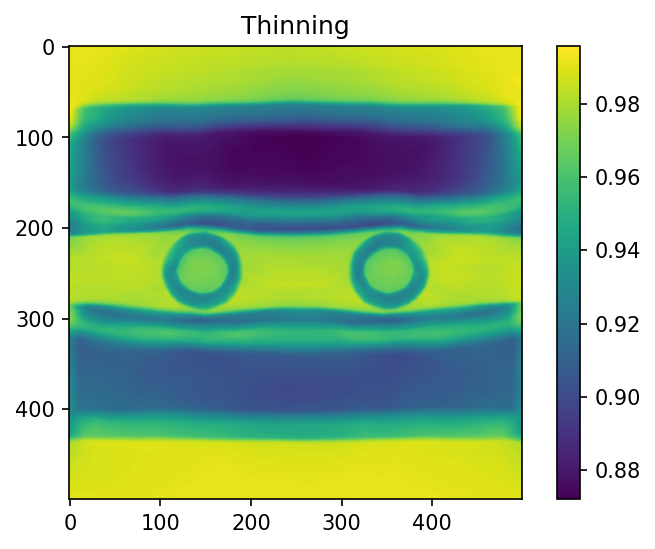

In [39]:
uv, coord = reg_xyz.predict(process_parameters, 
    positions=(500, 500))
_, feat = reg_thickness.predict(process_parameters, 
    positions=(500, 500))

visualize(uv, feat)

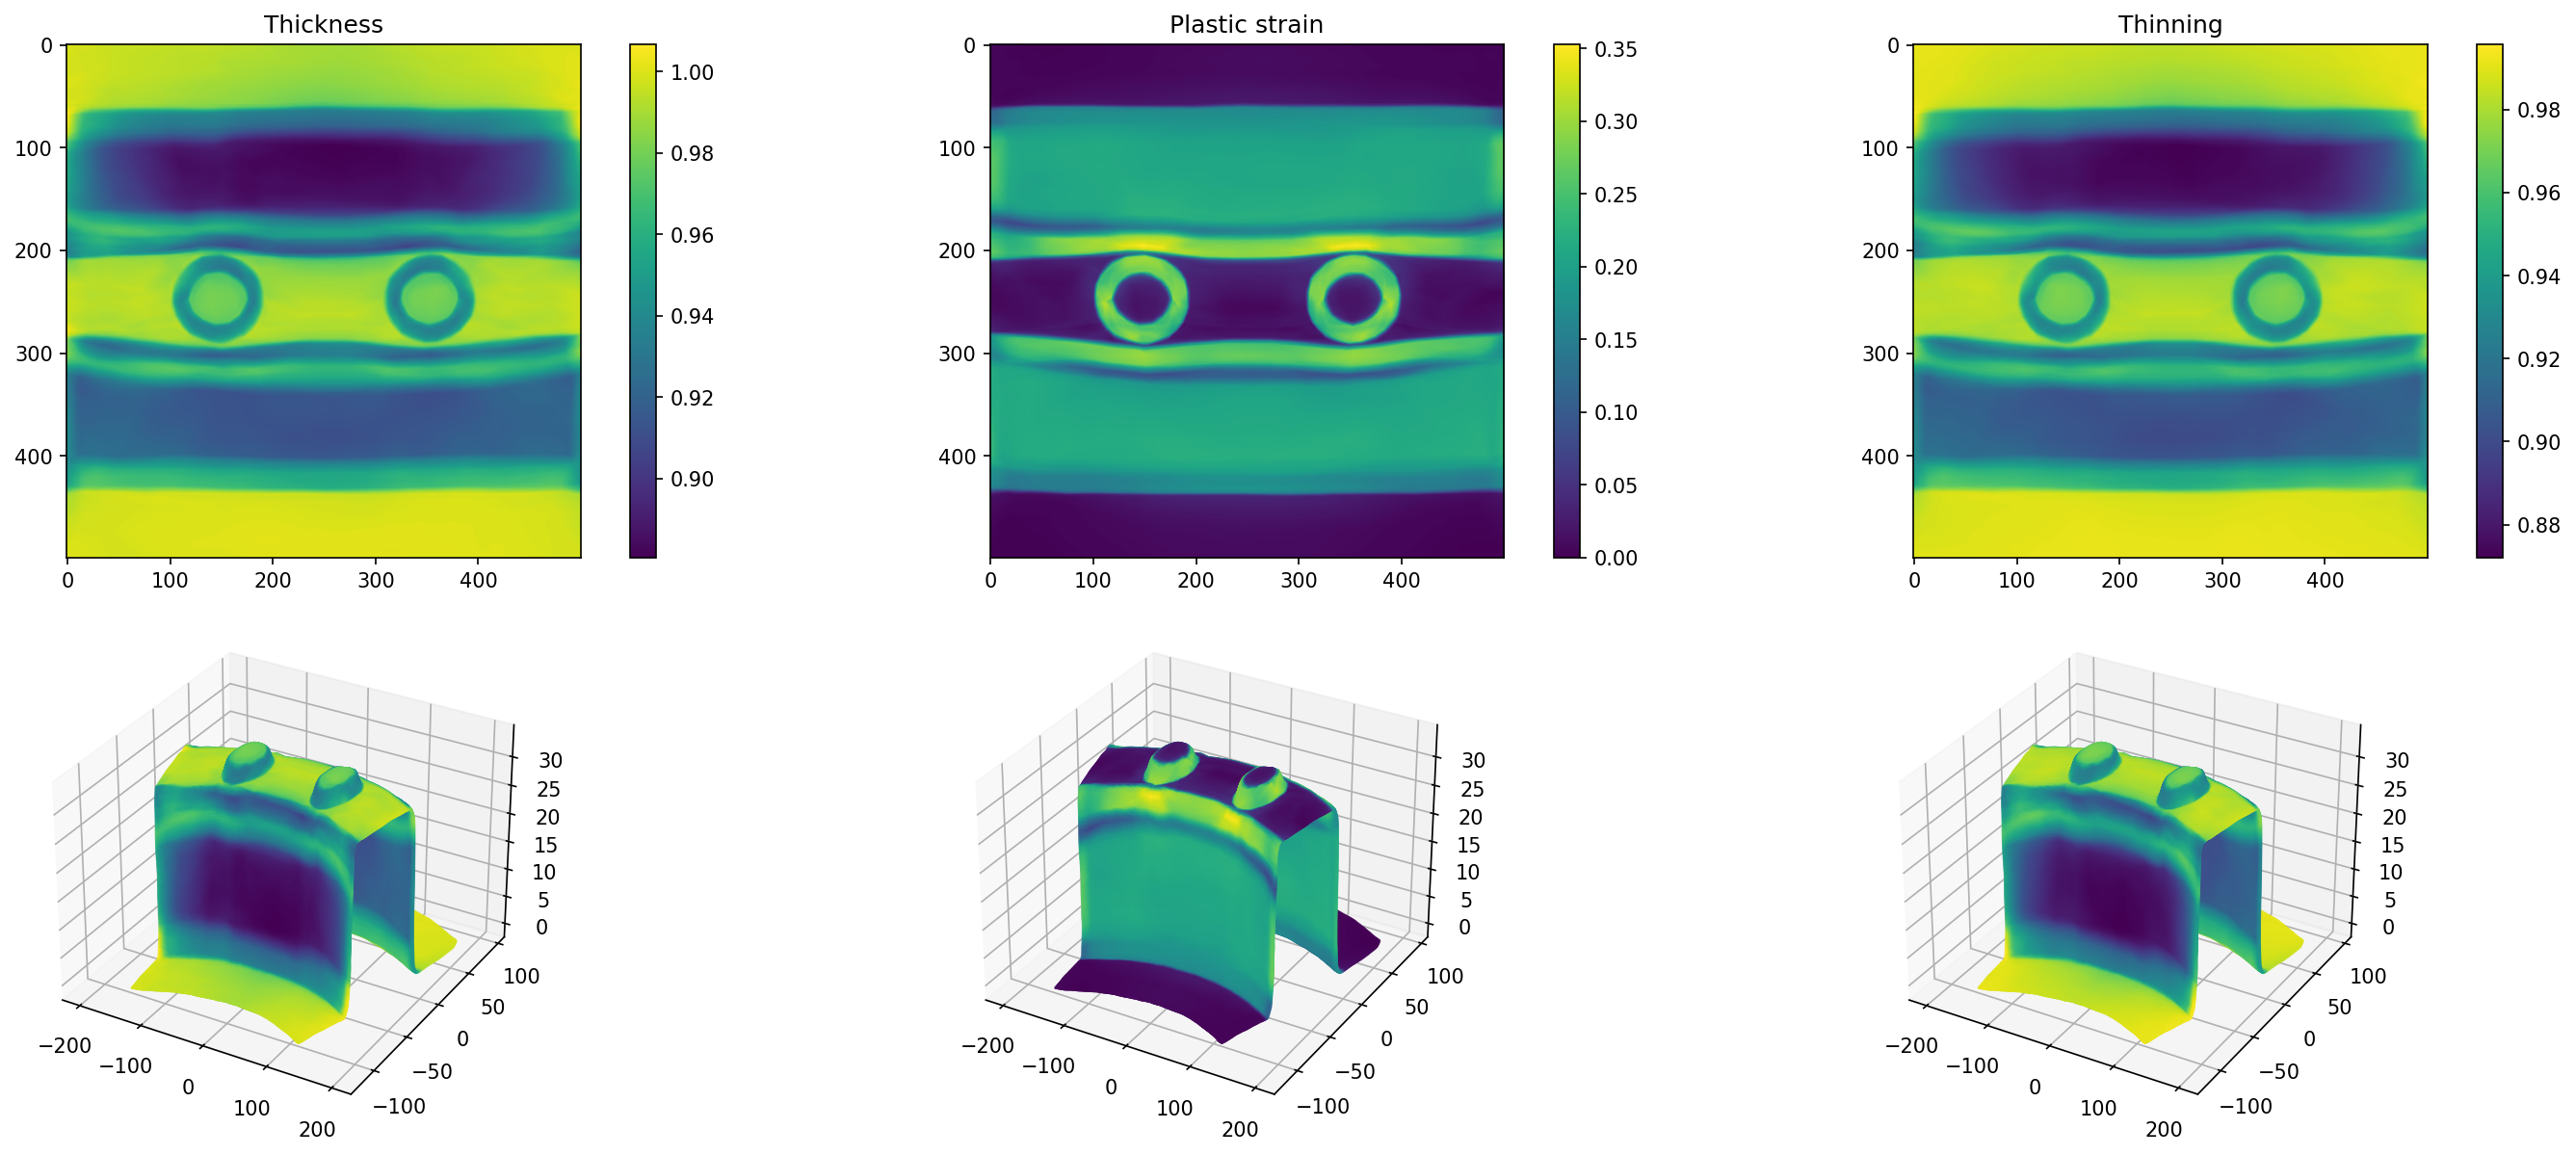

In [40]:
combine(coord, feat)